In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
FILE_PATH = './CCPP.csv'

dataset = pd.read_csv(FILE_PATH)
dataset.dropna(inplace=True)
X_dataset = dataset.iloc[:, :-1].values.reshape(-1,4)
Y_dataset = dataset.iloc[:, -1:].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, test_size=0.2, shuffle=False)

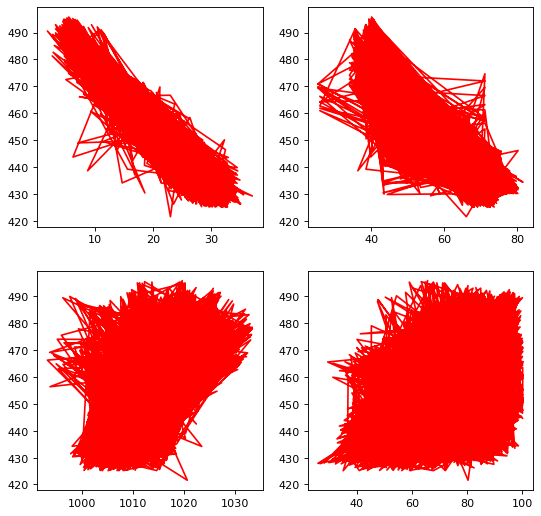

In [44]:
plt.figure(figsize=(8,8), dpi=80)
plt.figure(1)

ax1 = plt.subplot(2,2,1)
ax1.plot(X_train[:,0],Y_train, color="r")
ax2 = plt.subplot(2,2,2)
ax2.plot(X_train[:,1],Y_train,color="r")
ax3 = plt.subplot(2,2,3)
ax3.plot(X_train[:,2],Y_train,color="r")
ax4 = plt.subplot(2,2,4)
ax4.plot(X_train[:,3],Y_train,color="r")

In [45]:
LR_Model = LinearRegression()
LR_Model.fit(X_train, Y_train)
print(LR_Model.intercept_)
print(LR_Model.coef_)

[454.97700583]
[[-1.99227168 -0.22713758  0.06183797 -0.16061702]]


In [46]:
w = LR_Model.coef_
b = LR_Model.intercept_

Y=X_train.dot(w.T)+b

In [47]:
Y_pred = LR_Model.predict(X_test)
# 用scikit-learn计算MSE
print("MSE ",metrics.mean_squared_error(Y_test, Y_pred))
# 用scikit-learn计算RMSE
print("RMSE ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MSE  21.731103492645918
RMSE  4.661663168081314


In [53]:

(X_test.dot(w.T)+b==Y_pred).all()

True